# **NETFLIX DATA ANALYSIS**

### **Importing Libraries**

In [1]:
#importing  neccesary library and  data 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Polygon
from wordcloud import WordCloud
import matplotlib.dates as mdates
%matplotlib inline
import datetime as dt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/netflix-data-cleaning-analysis-and-visualization/netflix1.csv


### **Loading the Dataset**

In [2]:
#importing dataset
netflix = pd.read_csv('../input/netflix-data-cleaning-analysis-and-visualization/netflix1.csv')
netflix

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


### **Shape of the Dataset**

In [3]:
netflix.shape

(8790, 10)

In [4]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


### **Check for NULL Values**

In [5]:
netflix.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

### **Handling Duplicate values**

In [6]:
#removed all duplicates

# dropped ALL duplicate values
netflix.drop_duplicates(subset ="show_id",keep = False, inplace = True)
netflix.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [7]:
# Convert date type format
netflix["date_added"] = pd.to_datetime(netflix['date_added'])
netflix['month_added'] = netflix['date_added'].dt.month_name()
netflix['year_added'] = netflix['date_added'].dt.year
netflix['day_added']=netflix['date_added'].dt.day_name()

### **Content type on Netflix**

In [8]:
#types of show on netflix
types =netflix.groupby(['type',])[ 'type'].count().reset_index(name='count')
types=types.set_index('type')
types

,count
type,
Movie,6126
TV Show,2664


Text(0.5, 1.0, 'types_of_show')

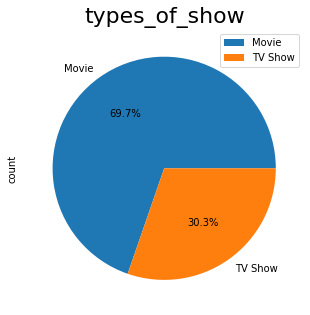

In [9]:
# percentage of types of show
types.plot.pie(y='count',autopct='%.1f%%',legend= 'type' , figsize=(5,6))
plt.title('types_of_show', fontsize=22)

### **Directors**

In [10]:
#grouped by directors of show and type
show_director= netflix.groupby(['director', 'type'])[ 'director'].count().reset_index(name='show_count')
show_director

,director,type,show_count
0,A. L. Vijay,Movie,2
1,A. Raajdheep,Movie,1
2,A. Salaam,Movie,1
3,A.R. Murugadoss,Movie,2
4,Aadish Keluskar,Movie,1
...,...,...,...
4576,Çagan Irmak,Movie,1
4577,Ísold Uggadóttir,Movie,1
4578,Óskar Thór Axelsson,Movie,1
4579,Ömer Faruk Sorak,Movie,2


In [11]:
#top 10 directors
top10_directors=show_director.query("`show_count` >= 12")
top10_directors

,director,type,show_count
127,Alastair Fothergill,TV Show,14
690,Cathy Garcia-Molina,Movie,13
1800,Jay Chapman,Movie,12
1803,Jay Karas,Movie,14
2623,Marcus Raboy,Movie,15
2699,Martin Scorsese,Movie,12
3100,Not Given,Movie,173
3101,Not Given,TV Show,2415
3432,Rajiv Chilaka,Movie,19
3484,"Raúl Campos, Jan Suter",Movie,18


### **Countries producing most content**

In [12]:
#Top-20 countries producing most contents:
show_origin= netflix.groupby(['country'])['country'].count().reset_index(name='show_count')
s_origin = pd.DataFrame(show_origin)
origin = s_origin.sort_values(by='show_count', ascending=False)
origin = origin.head(20)
origin

,country,show_count
80,United States,3240
29,India,1057
79,United Kingdom,638
52,Pakistan,421
51,Not Given,287
10,Canada,271
36,Japan,259
68,South Korea,214
20,France,213
70,Spain,182


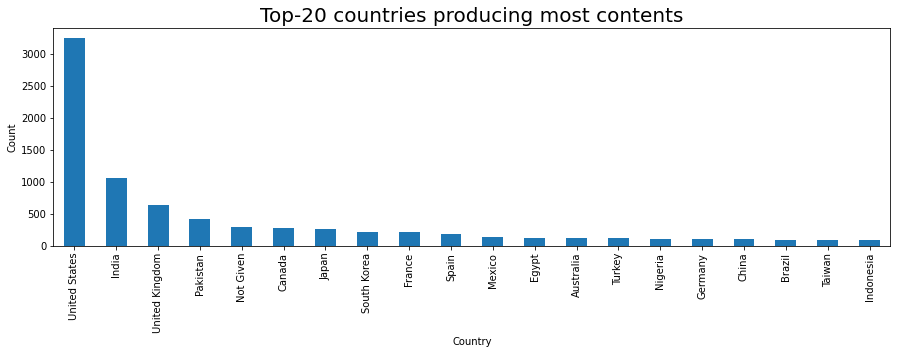

In [13]:
origin.plot.bar(x='country', y='show_count',figsize =(15,4)
                ,xlabel='Country',ylabel='Count',legend=False)
plt.title('Top-20 countries producing most contents', fontsize=20)
plt.show()

### **Genre Relationship**

In [14]:
#grouped by listed_In and type
show_genre= netflix.groupby(['listed_in','type'])[ 'type'].count().reset_index(name='show_genre_count')
show_genre

,listed_in,type,show_genre_count
0,Action & Adventure,Movie,128
1,"Action & Adventure, Anime Features",Movie,1
2,"Action & Adventure, Anime Features, Children &...",Movie,4
3,"Action & Adventure, Anime Features, Classic Mo...",Movie,2
4,"Action & Adventure, Anime Features, Horror Movies",Movie,1
...,...,...,...
508,"TV Horror, TV Mysteries, Teen TV Shows",TV Show,1
509,"TV Horror, Teen TV Shows",TV Show,2
510,"TV Sci-Fi & Fantasy, TV Thrillers",TV Show,1
511,TV Shows,TV Show,16


Text(0.5, 1.0, 'Top 10 Genres of Movies')

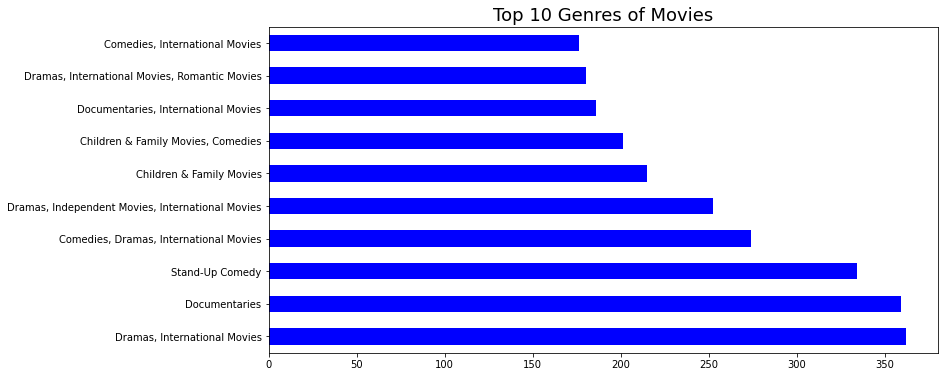

In [15]:
#Top 10 Genres of Movies
plt.figure(figsize=(12,6))
netflix[netflix["type"]=="Movie"]["listed_in"].value_counts()[:10].plot(kind="barh",color="blue")
plt.title("Top 10 Genres of Movies",size=18)

Text(0.5, 1.0, 'Top 10 Genres of TV Shows')

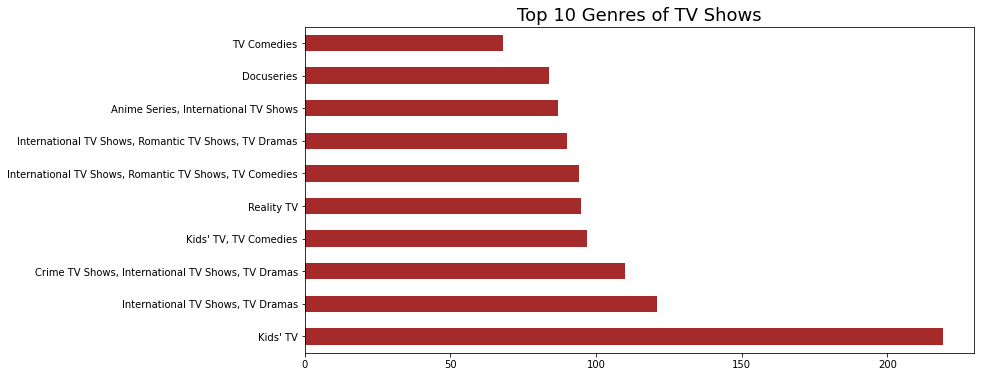

In [16]:
#Top 10 Genres of TV Shows
plt.figure(figsize=(12,6))
netflix[netflix["type"]=="TV Show"]["listed_in"].value_counts()[:10].plot(kind="barh",color="brown")
plt.title("Top 10 Genres of TV Shows",size=18)

### **Rating Distribution**

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Rating')

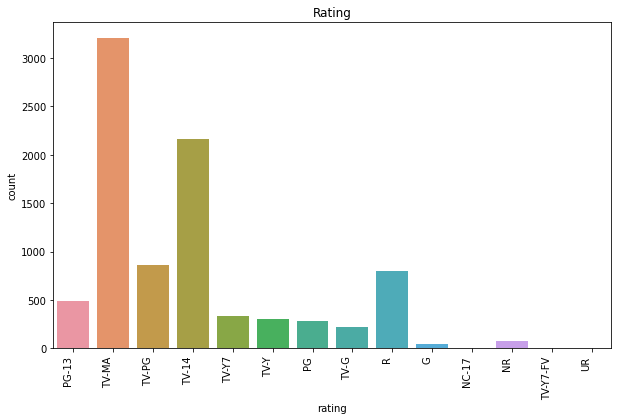

In [17]:
#Rating of shows and movies
sns.countplot(netflix['rating']).set_xticklabels(sns.countplot(netflix['rating']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(10,6)
plt.title('Rating')

In [18]:
#grouped by rating and type
show_rating= netflix.groupby(['rating','type'])[ 'rating'].count().reset_index(name='ratings_count')
show_rating=show_rating.set_index('rating')
show_rating

,type,ratings_count
rating,,
G,Movie,41
NC-17,Movie,3
NR,Movie,75
NR,TV Show,4
PG,Movie,287
PG-13,Movie,490
R,Movie,797
R,TV Show,2
TV-14,Movie,1427


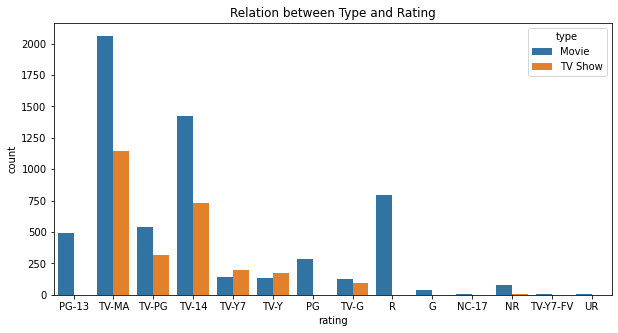

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(x='rating',hue='type',data=netflix)
plt.title('Relation between Type and Rating')
plt.show()

In [20]:
dsc= netflix.groupby(['duration','type'])[ 'type'].count().reset_index(name='dsc')
dsc
#SORT
dsc.sort_values(by=['type'], ascending=False)

,duration,type,dsc
0,1 Season,TV Show,1791
25,12 Seasons,TV Show,2
208,9 Seasons,TV Show,9
196,8 Seasons,TV Show,17
185,7 Seasons,TV Show,23
...,...,...,...
86,171 min,Movie,7
87,172 min,Movie,4
88,173 min,Movie,6
89,174 min,Movie,2


### **Contents added over the year**

In [21]:
#grouped by year_added and type
release_year= netflix.groupby(['year_added','type'])[ 'type'].count().reset_index(name='release_count')
release_year

,year_added,type,release_count
0,2008,Movie,1
1,2008,TV Show,1
2,2009,Movie,2
3,2010,Movie,1
4,2011,Movie,13
5,2012,Movie,3
6,2013,Movie,6
7,2013,TV Show,5
8,2014,Movie,19
9,2014,TV Show,5


[Text(0.5, 0, 'year'),
 Text(0, 0.5, 'release_count'),
 Text(0.5, 1.0, 'release_per_year')]

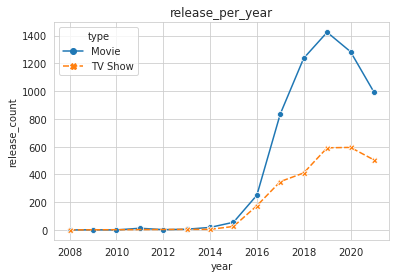

In [22]:
sns.set_style("whitegrid")
# plot boxplot
gfg = sns.lineplot(x ="year_added", y ="release_count", hue="type" ,style="type", markers=True, data = release_year)
 
# add label to the axis and label to the plot
gfg.set(xlabel ="year", ylabel = "release_count", title ='release_per_year')

### **Contents over the Month**

In [23]:
#grouped by month_added and type
release_month= netflix.groupby(['month_added','type'])[ 'type'].count().reset_index(name='release_month')
release_month

,month_added,type,release_month
0,April,Movie,549
1,April,TV Show,214
2,August,Movie,518
3,August,TV Show,236
4,December,Movie,547
5,December,TV Show,265
6,February,Movie,382
7,February,TV Show,180
8,January,Movie,545
9,January,TV Show,192


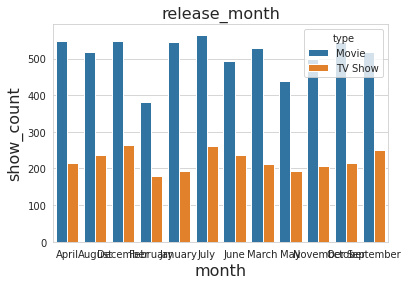

In [24]:
sns.barplot(x =release_month.reset_index()['month_added'], y= release_month.reset_index()['release_month'],
            hue =  release_month.reset_index()['type']);
plt.title('release_month' , fontsize=16)
plt.xlabel('month', fontsize=16);
plt.ylabel('show_count', fontsize=16);
sns.set(rc = {'figure.figsize':(10,18)})

In [25]:
#grouped by day_added and type
release_Day= netflix.groupby(['day_added','type'])[ 'type'].count().reset_index(name='release_Day')
release_Day

,day_added,type,release_Day
0,Friday,Movie,1565
1,Friday,TV Show,932
2,Monday,Movie,627
3,Monday,TV Show,223
4,Saturday,Movie,557
5,Saturday,TV Show,259
6,Sunday,Movie,569
7,Sunday,TV Show,182
8,Thursday,Movie,1052
9,Thursday,TV Show,341


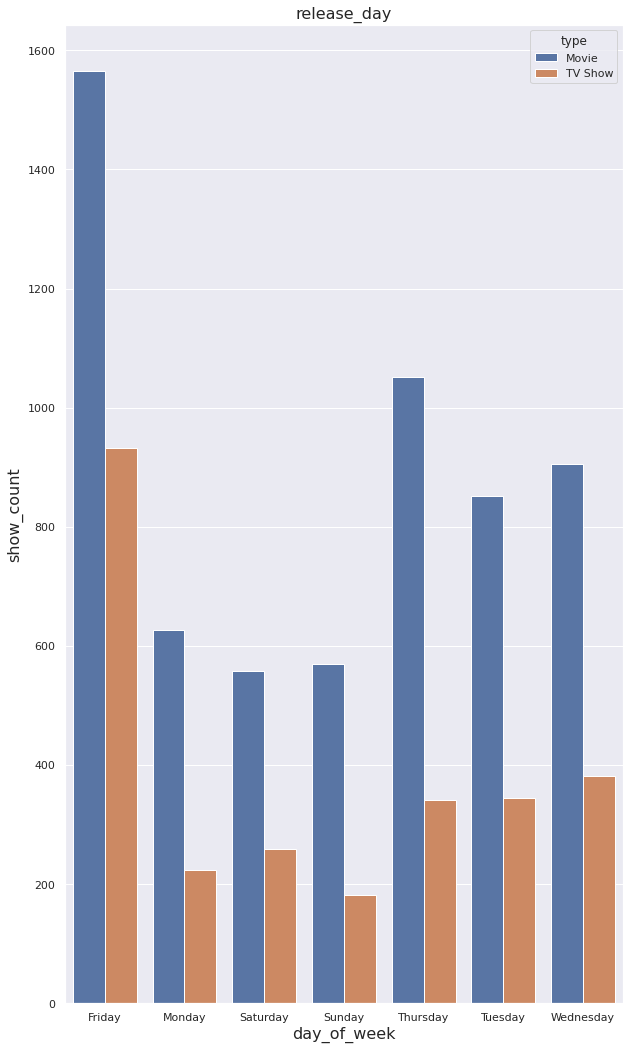

In [26]:
sns.barplot(x =release_Day.reset_index()['day_added'], y= release_Day.reset_index()['release_Day'],
            hue =  release_Day.reset_index()['type']);
plt.title('release_day' , fontsize=16)
plt.xlabel('day_of_week', fontsize=16);
plt.ylabel('show_count', fontsize=16);
sns.set(rc = {'figure.figsize':(10,20)})

# **KEY FINDINGS**

* **A pie chart comparing Netflix movie uploads to TV show uploads from 2008 to 2021 reveals a 39.4% increase in movie uploads.**


* **Netflix has the most movies and TV episodes from the United States, followed by India in second place and the United Kingdom in third place.**

* **Netflix has the most titles in the "Dramas, International Movies" genre, followed by Documentaries in second place and Stand-Up Comedy in third, according to the overall top 10 genre of Movies.**

* **In Netflix has majority of TV programmes are intended for kids tv, followed by International TV Shows, TV Dramas in second place and Crime TV Shows, International TV Shows, TV Dramas in third, according to the overall top 10 genre of TV Shows.**

* **In the overall rating distribution, we can see that most of content are rated TV-MA, indicating that the majority of the shows are for mature audiences, with TV-14 ratings coming in second. Parental Guidelines denotes content, and R rating at the third R classification denotes that the film is not suitable for minors to watch due to violence, offensive language, or sexual activity.**

* **The type wise rating distribution reveals that most of movie content are rated TV-MA, followed by TV-14 rating and the third most movie content are rated R.In TV Shows most of the content are rated TV-MA, followed by TV-14 rating and TV-PG, which denotes under parental guidance**

* **In the release per year linechart, we can observe that Netflix began to add shows in large quantities from 2014.**

* **The release month barchart indicates that Netflix routinely releases new shows throughout the year.**

* **The majority of the shows on Netflix are released on Friday, as can be seen in the release day barchart.**